In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('shampoo_sales.csv')

In [4]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [7]:
from datetime import datetime
def parser(x):
    return datetime.strptime('200'+x,'%Y-%m')
df=pd.read_csv('shampoo_sales.csv',header=0,index_col=0,parse_dates=[0],date_parser=parser)

In [8]:
df=pd.read_csv('shampoo_sales.csv',header=0,index_col=0,parse_dates=[0],date_parser=parser)

C:\Users\sadhi\AppData\Local\Temp\ipykernel_26220\2403178278.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv('shampoo_sales.csv',header=0,index_col=0,parse_dates=[0],date_parser=parser)


In [9]:
df

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


In [12]:
df['lag1']=df['Sales'].shift(1)
df.head()

,Sales,lag1
Month,,
2001-01-01,266.0,NaN
2001-02-01,145.9,266.0
2001-03-01,183.1,145.9
2001-04-01,119.3,183.1
2001-05-01,180.3,119.3


In [13]:
df['rmean']=df['Sales'].rolling(5).mean()

In [14]:
df['rmax']=df['Sales'].rolling(5).max()
df['rmin']=df['Sales'].rolling(5).min()
df['rstd']=df['Sales'].rolling(5).std()

In [15]:
df.head()

,Sales,lag1,rmean,rmax,rmin,rstd
Month,,,,,,
2001-01-01,266.0,NaN,NaN,NaN,NaN,NaN
2001-02-01,145.9,266.0,NaN,NaN,NaN,NaN
2001-03-01,183.1,145.9,NaN,NaN,NaN,NaN
2001-04-01,119.3,183.1,NaN,NaN,NaN,NaN
2001-05-01,180.3,119.3,178.92,266.0,119.3,55.333462


In [16]:
df['emean']=df['Sales'].expanding().mean()
df['emax']=df['Sales'].expanding().max()
df['emin']=df['Sales'].expanding().min()
df['estd']=df['Sales'].expanding().std()



In [17]:
df

,Sales,lag1,rmean,rmax,rmin,rstd,emean,emax,emin,estd
Month,,,,,,,,,,
2001-01-01,266.0,NaN,NaN,NaN,NaN,NaN,266.000000,266.0,266.0,NaN
2001-02-01,145.9,266.0,NaN,NaN,NaN,NaN,205.950000,266.0,145.9,84.923524
2001-03-01,183.1,145.9,NaN,NaN,NaN,NaN,198.333333,266.0,145.9,61.482057
2001-04-01,119.3,183.1,NaN,NaN,NaN,NaN,178.575000,266.0,119.3,63.887368
2001-05-01,180.3,119.3,178.92,266.0,119.3,55.333462,178.920000,266.0,119.3,55.333462
2001-06-01,168.5,180.3,159.42,183.1,119.3,26.793507,177.183333,266.0,119.3,49.674235
2001-07-01,231.8,168.5,176.60,231.8,119.3,40.161798,184.985714,266.0,119.3,49.823837
2001-08-01,224.5,231.8,184.88,231.8,119.3,45.719930,189.925000,266.0,119.3,48.197058
2001-09-01,192.8,224.5,199.58,231.8,168.5,27.580736,190.244444,266.0,119.3,45.094404


In [21]:
df=pd.read_csv('bill charge.csv',parse_dates=['Date'])

In [22]:
df.head()

,Date,Patient Name,Age,Bill Charge
0,2023-01-01,Bob,33,100.5
1,2023-01-04,Bob,24,250.0
2,2023-01-07,Bob,56,75.0
3,2023-01-07,Eve,40,300.0
4,2023-01-09,Charlie,40,150.5


In [25]:
df=pd.read_csv('daily-min-temperatures.csv',index_col=0)

In [26]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


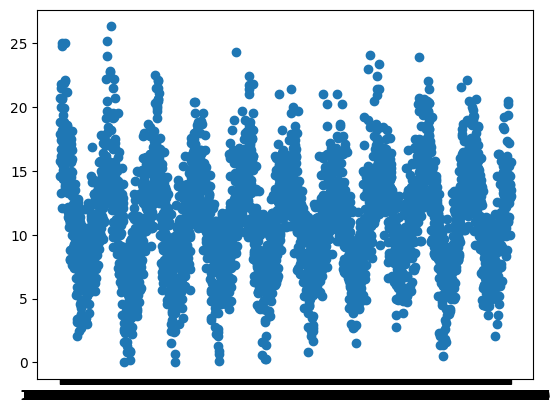

In [29]:
plt.scatter(df.index,df['Temp'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

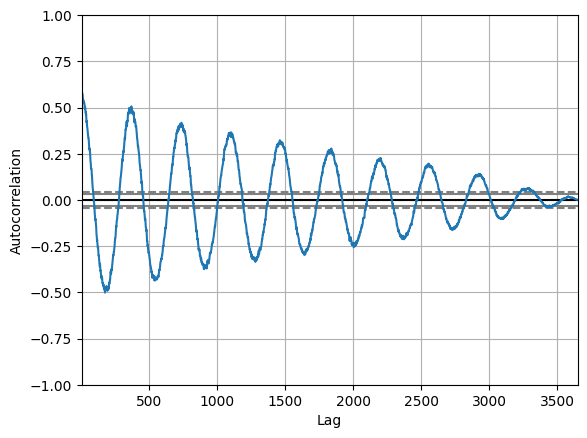

In [30]:
pd.plotting.autocorrelation_plot(df['Temp'])

(array([ 53., 181., 564., 862., 830., 670., 347., 102.,  32.,   9.]),
 array([ 0.  ,  2.63,  5.26,  7.89, 10.52, 13.15, 15.78, 18.41, 21.04,
        23.67, 26.3 ]),
 <BarContainer object of 10 artists>)

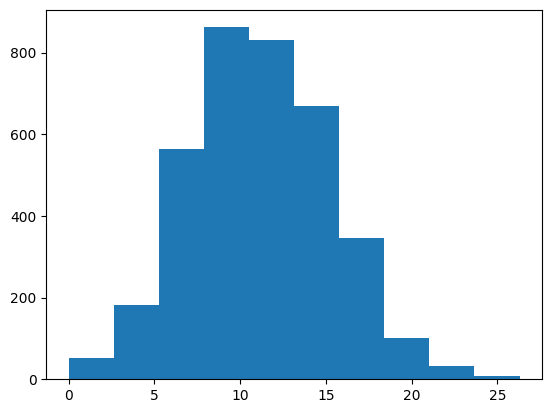

In [31]:
plt.hist(df['Temp'])

<Axes: xlabel='Temp', ylabel='Density'>

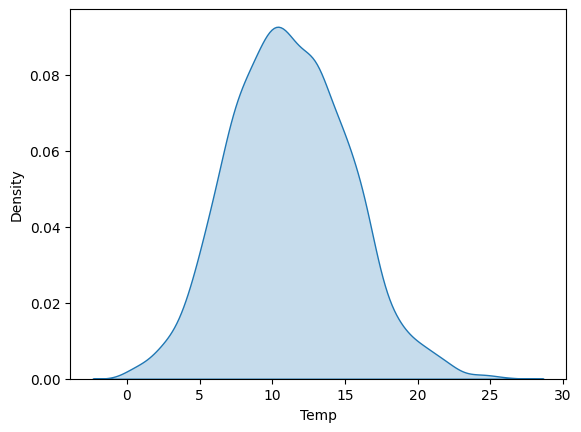

In [32]:
sns.kdeplot(df['Temp'],fill=True)

<Axes: xlabel='Temp'>

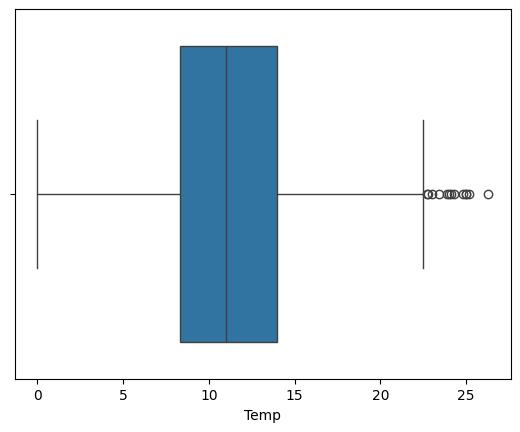

In [33]:
sns.boxplot(x=df['Temp'])

<Axes: ylabel='Date'>

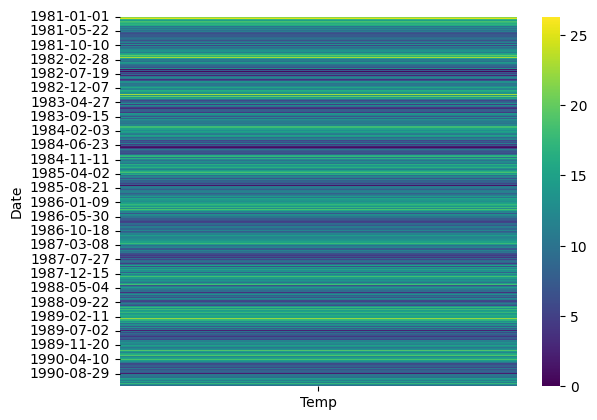

In [34]:
sns.heatmap(df,cmap='viridis')

In [37]:
df=pd.read_csv('shampoo_sales.csv',index_col=0)

In [38]:
df.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


<Axes: xlabel='Month'>

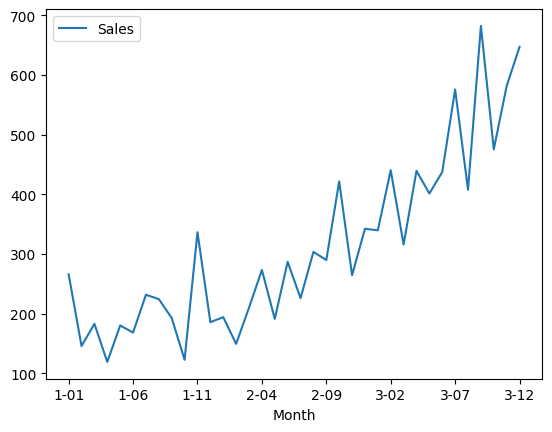

In [39]:
df.plot()

In [40]:
from datetime import datetime
def parser(x):
    return datetime.strptime('200'+x,'%Y-%m')
df=pd.read_csv('shampoo_sales.csv',header=0,index_col=0,parse_dates=[0],date_parser=parser)

C:\Users\sadhi\AppData\Local\Temp\ipykernel_26220\1173311669.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv('shampoo_sales.csv',header=0,index_col=0,parse_dates=[0],date_parser=parser)


<Axes: xlabel='Month'>

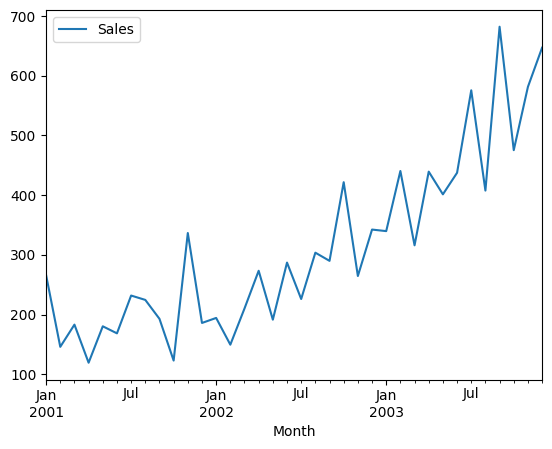

In [41]:
df.plot()

In [42]:
df1=pd.read_csv('shampoo_sales.csv',header=0,index_col=0,parse_dates=[0],date_parser=parser)

C:\Users\sadhi\AppData\Local\Temp\ipykernel_26220\3712867368.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df1=pd.read_csv('shampoo_sales.csv',header=0,index_col=0,parse_dates=[0],date_parser=parser)


In [43]:
us=df1.resample('D')

In [44]:
ip=us.interpolate(method='linear')

In [45]:
ip.head(30)

,Sales
Month,
2001-01-01,266.000000
2001-01-02,262.125806
2001-01-03,258.251613
2001-01-04,254.377419
2001-01-05,250.503226
2001-01-06,246.629032
2001-01-07,242.754839
2001-01-08,238.880645
2001-01-09,235.006452


In [46]:
ip=us.interpolate(method='spline',order=2)

In [47]:
ip.head()

,Sales
Month,
2001-01-01,266.000000
2001-01-02,258.630160
2001-01-03,251.560886
2001-01-04,244.720748
2001-01-05,238.109746


<Axes: xlabel='Month'>

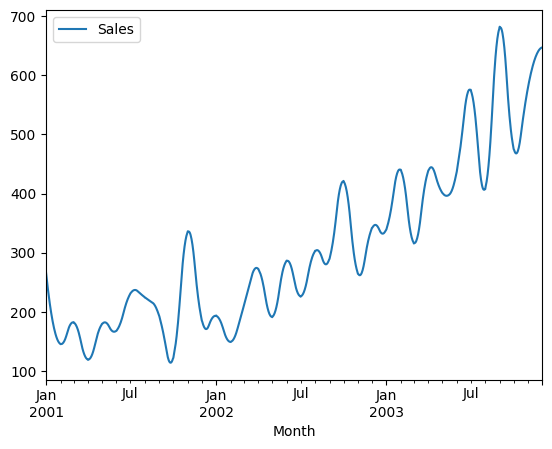

In [48]:
ip.plot()

In [49]:
rs=df1.resample('Q')

C:\Users\sadhi\AppData\Local\Temp\ipykernel_26220\2181703931.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  rs=df1.resample('Q')


In [50]:
qms=rs.mean()

In [51]:
qms.head()

,Sales
Month,
2001-03-31,198.333333
2001-06-30,156.033333
2001-09-30,216.366667
2001-12-31,215.100000
2002-03-31,184.633333


<Axes: xlabel='Month'>

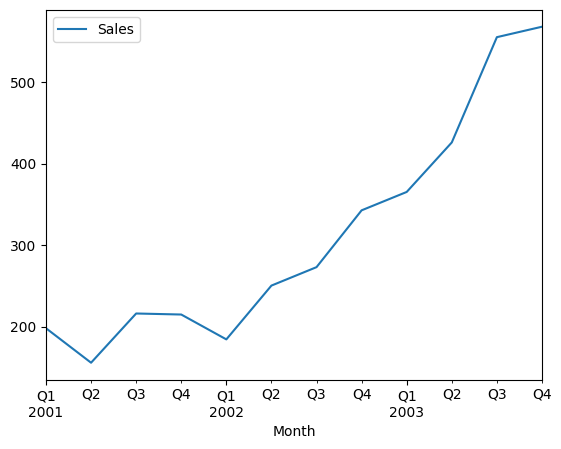

In [53]:
qms.plot()

In [54]:
rs=df1.resample('A')
qms=rs.sum()

C:\Users\sadhi\AppData\Local\Temp\ipykernel_26220\1918323995.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  rs=df1.resample('A')


In [55]:
qms.head()

,Sales
Month,
2001-12-31,2357.5
2002-12-31,3153.5
2003-12-31,5742.6


<Axes: xlabel='Month'>

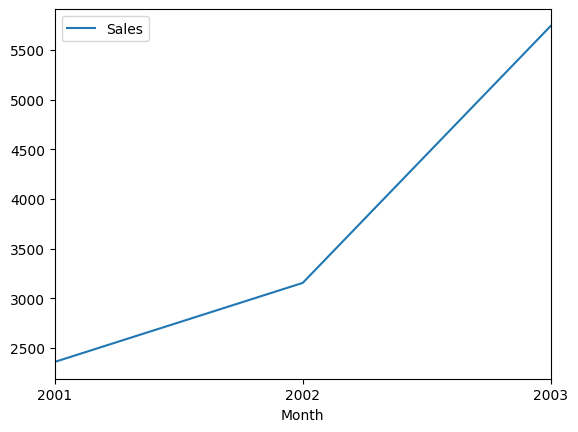

In [56]:
qms.plot()

In [59]:
df=pd.read_csv('daily-total-female-births.csv',index_col=0)

In [60]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


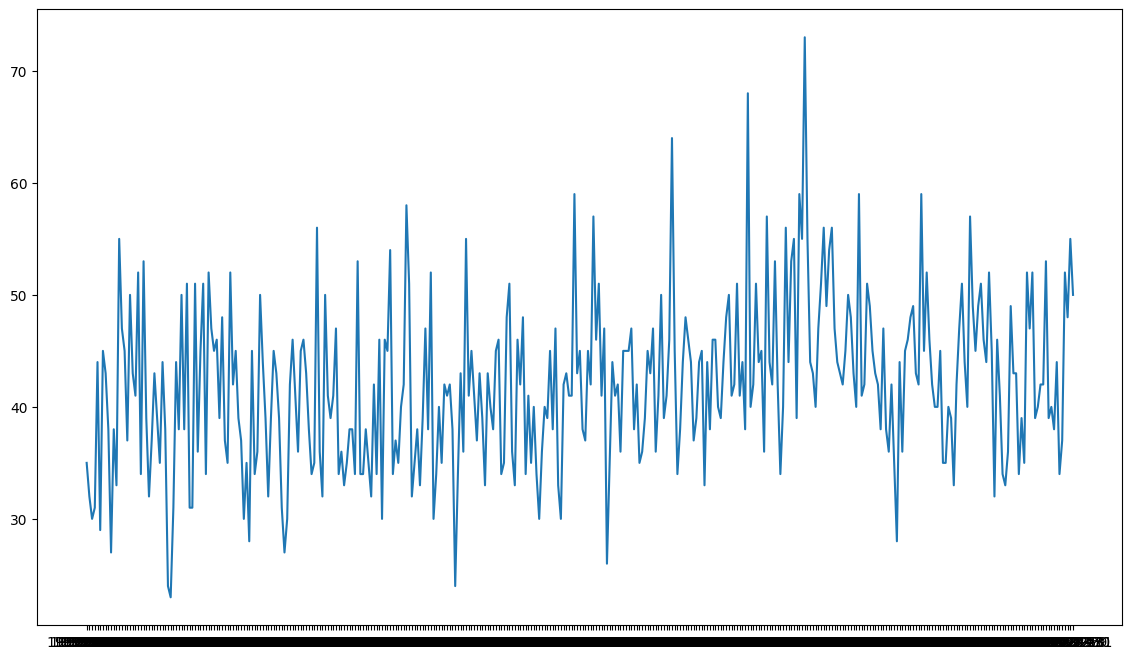

In [68]:
plt.figure(figsize=(14,8))
plt.plot(df)

In [75]:
from statsmodels.tsa.stattools import kpss

In [76]:
def kpss1(series):
    s,p,l,cv=kpss(series)
    print(s)
    print(p)
    print(l)
    print(cv)
    if(p<0.05):
        print("Not stationary")
    else:
        print("Stationary")

In [77]:
kpss1(df['Births'])

1.6129657593856863
0.01
7
{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Not stationary


C:\Users\sadhi\AppData\Local\Temp\ipykernel_26220\2808014385.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  s,p,l,cv=kpss(series)


In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df['Births'],model='additive',period=12)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

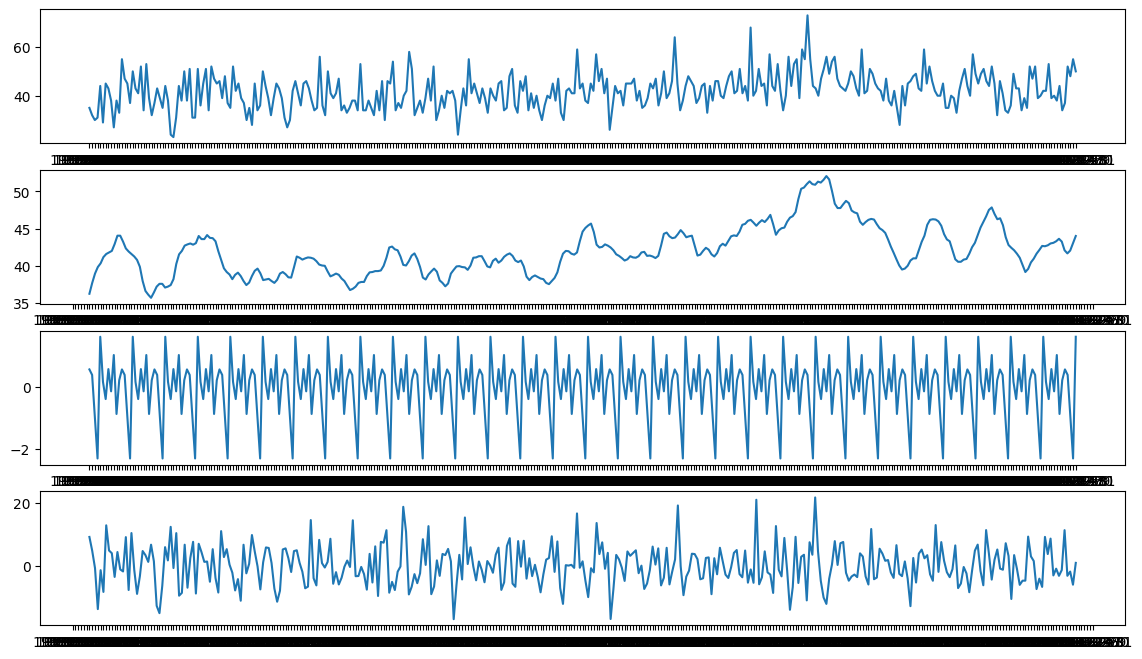

In [81]:
plt.figure(figsize=(14,8))
plt.subplot(411)
plt.plot(df['Births'])
plt.subplot(412)
plt.plot(trend)
plt.subplot(413)
plt.plot(seasonal)
plt.subplot(414)
plt.plot(residual)


<Axes: title={'center': 'Total Births'}, xlabel='Date'>

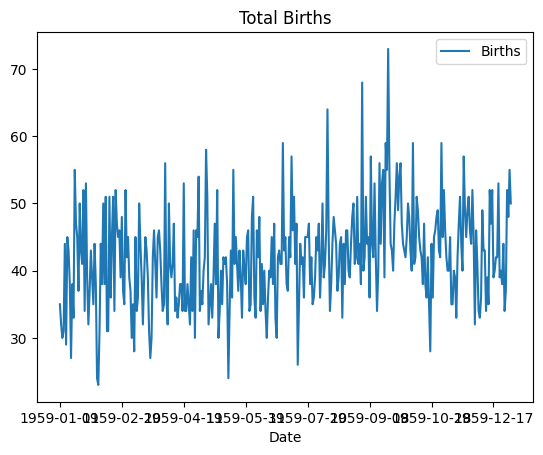

In [82]:
df.plot(title='Total Births')

In [83]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

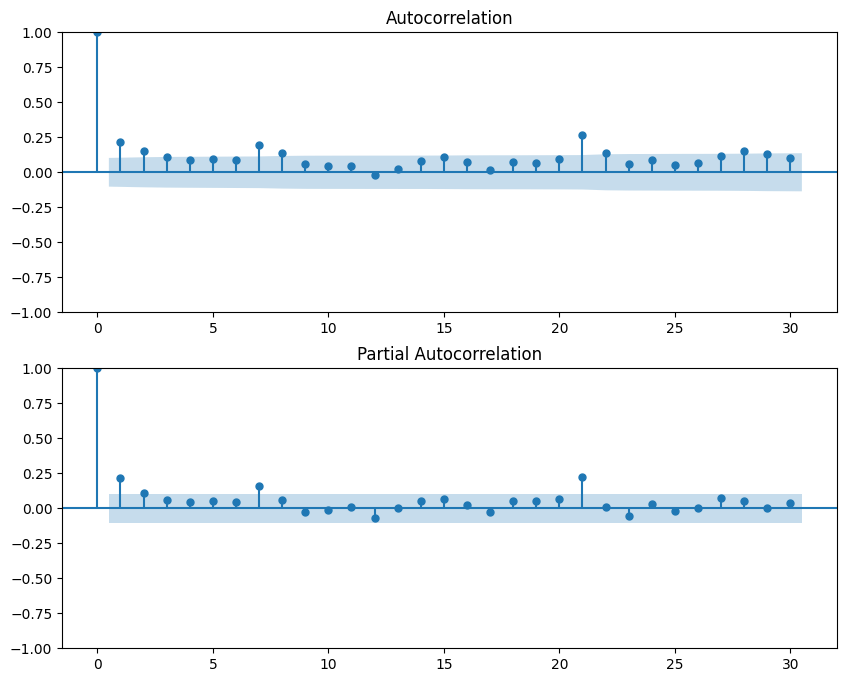

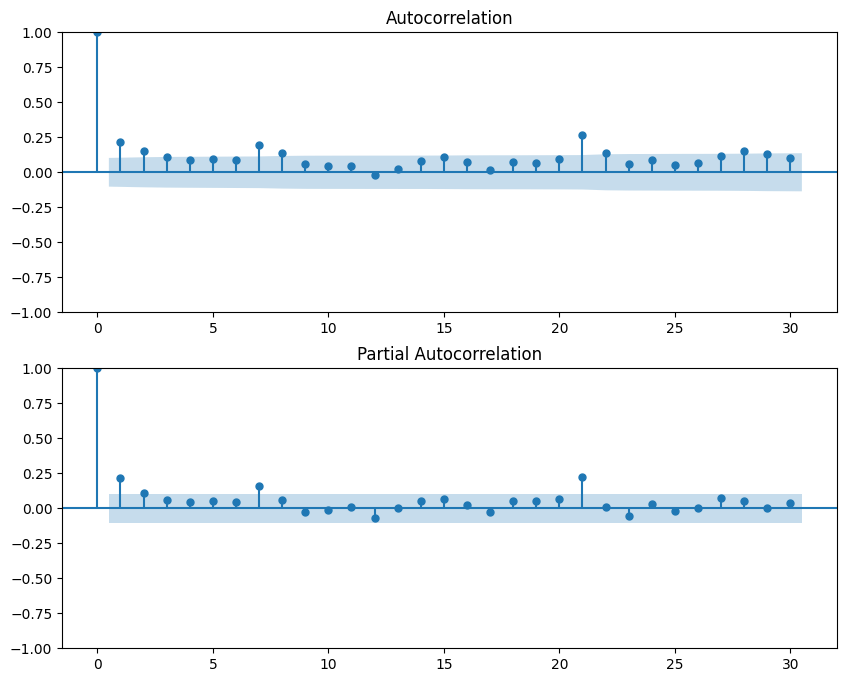

In [88]:
fig,axes=plt.subplots(2,1,figsize=(10,8))
plot_acf(df['Births'],lags=30,ax=axes[0])
plot_pacf(df['Births'],lags=30,ax=axes[1])

In [93]:
df=pd.read_csv('daily-min-temperatures.csv',index_col=0)

In [94]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<Axes: xlabel='Date'>

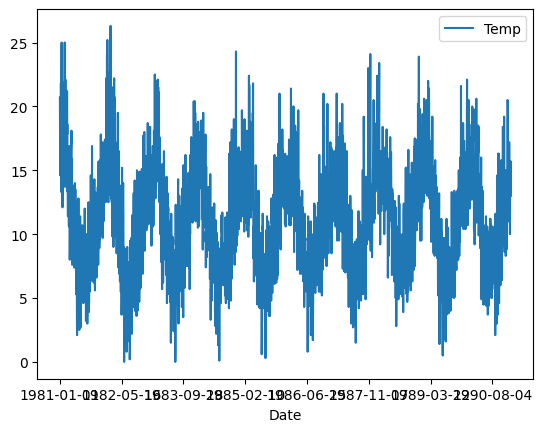

In [95]:
df.plot()

In [96]:
series=pd.read_csv('daily-min-temperatures.csv',header=0,index_col=0,parse_dates=True)

In [97]:
series

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [98]:
ds=series.diff(periods=1)

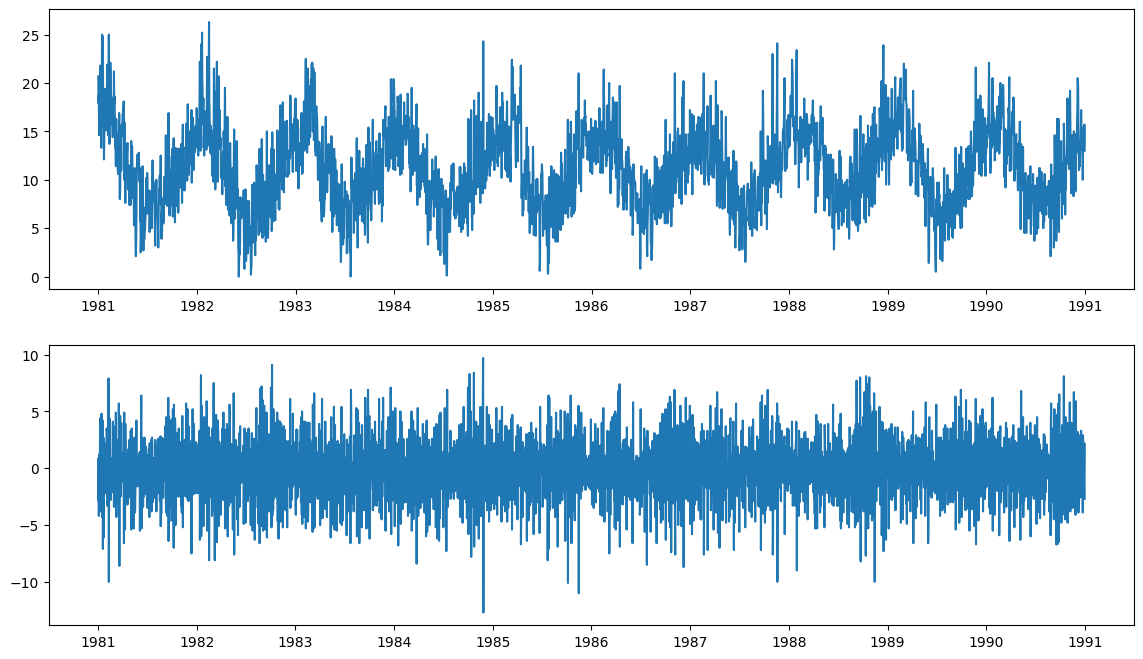

In [100]:
fig,axes=plt.subplots(2,1,figsize=(14,8))
axes[0].plot(series)
axes[1].plot(ds)

In [101]:
ds

,Temp
Date,
1981-01-01,NaN
1981-01-02,-2.8
1981-01-03,0.9
1981-01-04,-4.2
1981-01-05,1.2
...,...
1990-12-27,-0.6
1990-12-28,-0.4
1990-12-29,-0.1


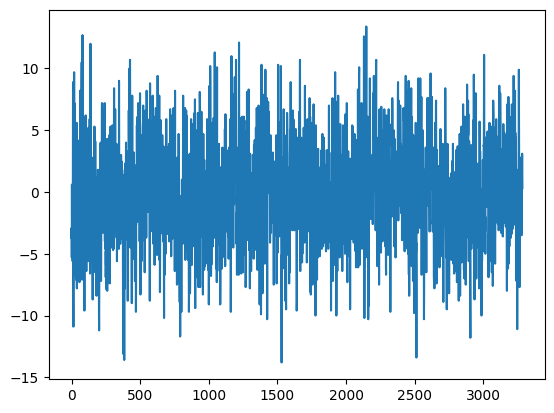

In [102]:
X=series.values
diff=list()
days_in_year=365
for i in range(days_in_year,len(X)):
    value=X[i]-X[i - days_in_year]
    diff.append(value)
plt.plot(diff)


<Axes: xlabel='Date'>

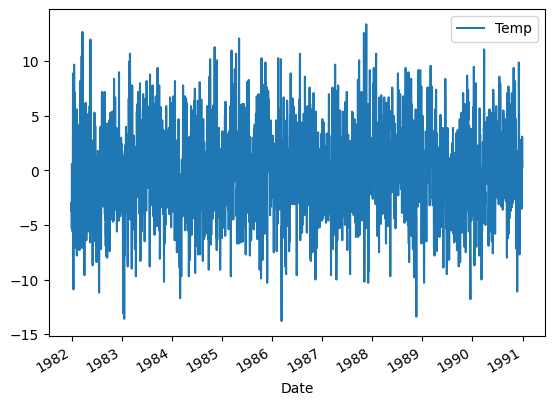

In [103]:
series.diff(periods=365).dropna().plot()


In [104]:
df['diff']=df['Temp'].diff(periods=1)

In [105]:
df

,Temp,diff
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,-2.8
1981-01-03,18.8,0.9
1981-01-04,14.6,-4.2
1981-01-05,15.8,1.2
...,...,...
1990-12-27,14.0,-0.6
1990-12-28,13.6,-0.4
1990-12-29,13.5,-0.1


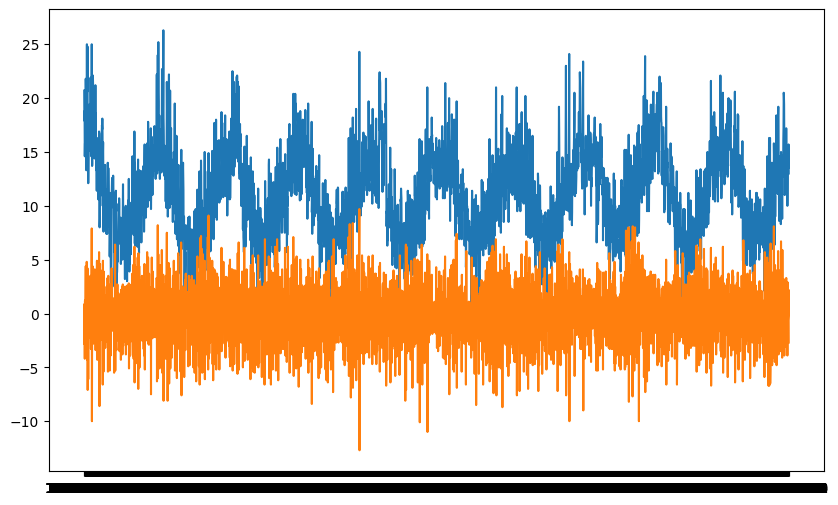

In [106]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df['Temp'],label='Original')
plt.plot(df.index,df['diff'],label='Differenced')

In [108]:
df = pd.read_csv('daily-min-temperatures.csv', header=0, index_col = 0)


In [ ]:
X = [i%365 for i in range(0, len(df))]
y = df.values
degree = 4
coef = np.polyfit(X, y, degree)
print("Coefficients:\n", coef)
curve = []
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += (X[i]**(degree - d)) * coef[d]
        curve.append(value)

values = df.values

diff = []
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)

plt.plot(diff)
plt.show()

[[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


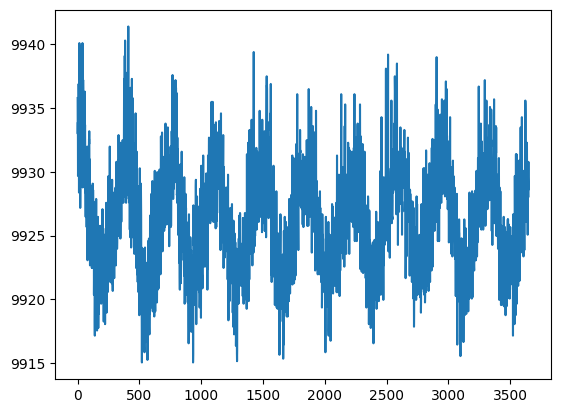

In [110]:
from numpy import polyfit
X=[i%365 for i in range(0,len(df))]
y=df.values
degree=4
coef=polyfit(X,y,degree)
print(coef)
curve=list()
for i in range(len(X)):
    value=coef[-1]
    for d in range(degree):
        value+= X[i]**(degree-d)*coef[d]
        curve.append(value)
values=series.values
diff=list()
for i in range(len(values)):
    value=values[i]-curve[i]
    diff.append(value)
plt.plot(diff)